# Data Exploration for Brown Datathon 2019

Panthon Imemkamon, Brown University

Thananun Prasertsup, Brown University

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
activity = pd.read_csv('activity_data.csv')
activity.head(2)

,date,user_id,user_country,device,hotel_id,user_action
0,2019-01-07,314066,Italy,iphone_native_app,570101,view
1,2019-01-02,314066,Italy,iphone_native_app,6002536,view


In [3]:
#We saved a list of users who booked for convenience
"""
bookdf = activity[activity.user_action=='booking']
booked_users = bookdf['user_id'].unique()
npbook = np.asarray(booked_users)
np.save('bookedusers', npbook)
"""
booked_users = np.load('bookedusers.npy')
print("Numbers of unique users who booked: "+str(len(booked_users))+ ' out of '+str(len(activity['user_id'].unique()))+' users' )

Numbers of unique users who booked: 8203 out of 363619 users


## Generate user features
In this section, we will attempt to generate several features for the users based on their activities.

num_interactions: The number of interactions the user made 

num_unique_hotel_browse: The number of unique hotels the user browsed

num_date: The number of days the user interact with TripAdvisor

num_actions: The number of unique actions made on TripAdvisor. We cleaned out booking because we will be comparing these features between users who booked in January and those who didn't. 

In [4]:
activity = activity[activity.user_action!='booking']
activity['num_interactions'] = activity.groupby('user_id')['hotel_id'].transform('count')
activity['num_unique_hotel_browse'] = activity.groupby('user_id')['hotel_id'].transform('nunique')
activity['num_date'] = activity.groupby('user_id')['date'].transform('nunique')
activity['num_actions'] = activity.groupby('user_id')['user_action'].transform('nunique')

Text(0,0.5,'num_users')

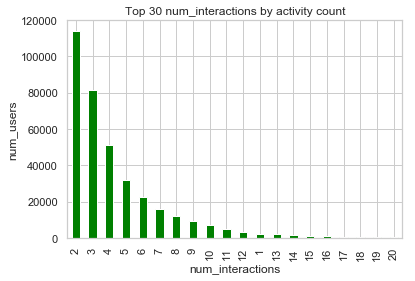

In [5]:
temp = activity.drop_duplicates(subset = 'user_id')
ax=temp['num_interactions'].value_counts().head(20).plot(kind='bar', color='green', title = 'Top 30 num_interactions by activity count' )
ax.set_xlabel("num_interactions")
ax.set_ylabel("num_users")

It is confirmed by TripAdvisor representative that most of the users with 1 interaction are cleaned out. 

Text(0,0.5,'num_users')

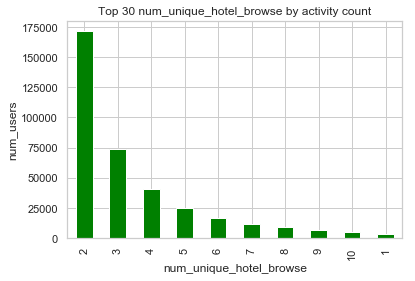

In [6]:

ax=temp['num_unique_hotel_browse'].value_counts().head(20).plot(kind='bar', color='green', title = 'Top 30 num_unique_hotel_browse by activity count' )
ax.set_xlabel("num_unique_hotel_browse")
ax.set_ylabel("num_users")

Text(0,0.5,'num_users')

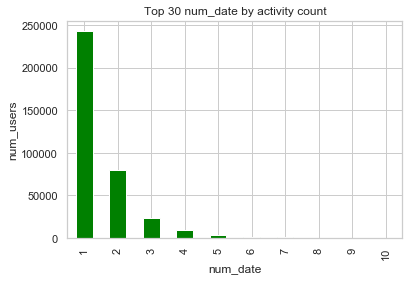

In [7]:
ax=temp['num_date'].value_counts().head(10).plot(kind='bar', color='green', title = 'Top 30 num_date by activity count' )
ax.set_xlabel("num_date")
ax.set_ylabel("num_users")

# Question: Is there, on average, a difference in these features between users who booked and those who didn't?

We will attempt to test this hypothesis by comparing the mean of features between users who have booked and those who didn't. 


In [8]:
#This is a simple column for indicating whether the user has booked any hotel or not. It is simply for convenience.
activity['booked'] = activity.apply(lambda row:1 if row['user_id'] in booked_users else 0, axis = 1)

In [9]:
booked_df = activity[activity.booked==1]
print('For '+str(len(booked_df['user_id'].unique()))+' users who booked: <mean> <std>')
print('Average number of interactions:',booked_df['num_interactions'].apply('mean'),booked_df['num_interactions'].apply('std') )
print('Average number of dates visited the site:',booked_df['num_date'].apply('mean'),booked_df['num_date'].apply('std'))
print('Average number of hotel browsed:',booked_df['num_unique_hotel_browse'].apply('mean'),booked_df['num_unique_hotel_browse'].apply('std'))
print('Average number of distinct actions:',booked_df['num_actions'].apply('mean'),booked_df['num_actions'].apply('std') )

For 8203 users who booked: <mean> <std>
Average number of interactions: 8.763376628480477 5.264112270727531
Average number of dates visited the site: 2.235522980487709 1.7982165219387563
Average number of hotel browsed: 5.220667701558233 2.5308390758432107
Average number of distinct actions: 2.1025328643571557 0.4005543298345818


In [10]:
non_booked_df = activity[activity.booked==0]
print('For '+str(len(non_booked_df['user_id'].unique()))+' users who did not book: <mean> <std>')
print('Average number of interactions:',non_booked_df['num_interactions'].apply('mean'), non_booked_df['num_interactions'].apply('std'))
print('Average number of dates visited the site:',non_booked_df['num_date'].apply('mean'), non_booked_df['num_date'].apply('std'))
print('Average number of hotel browsed:',non_booked_df['num_unique_hotel_browse'].apply('mean'), non_booked_df['num_unique_hotel_browse'].apply('std'))
print('Average number of distinct actions:',non_booked_df['num_actions'].apply('mean'), non_booked_df['num_actions'].apply('std'))

For 355416 users who did not book: <mean> <std>
Average number of interactions: 7.0786791476799085 11.188860878165421
Average number of dates visited the site: 2.2154688122938637 3.034642079852343
Average number of hotel browsed: 4.441464113792047 2.402887540747856
Average number of distinct actions: 1.6376025120180824 0.5935711131177804


## Analysis
TL;DR: There is no perceivable difference in these features between users who booked and those who don't. 

While the number of interactions made by users who booked are higher than those who didn't, the standard deviation is high and so we should not make any inference based on this summary statistics. The same goes for other columns. 

## Hypothesis: There is a correlation between users who browsed on more than one days and booking

We believe that users who keep coming back to TripAdvisor are more serious and is thus more likely to be a serious customer. Maybe showing booking percentage per num_date will offer us some insight. 

For all users: 
Numbers of users who booked:  8203
Numbers of total users:  363619
Percentage Booked:  0.022559327207874177
------------------------------


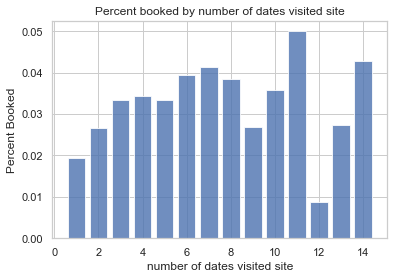

In [11]:
bdf = booked_df
num_booked_users = len(bdf['user_id'].unique())
df = non_booked_df
num_nb_users = len(df['user_id'].unique())
print('For all users: ')
print('Numbers of users who booked: ',num_booked_users)
print('Numbers of total users: ',num_booked_users+num_nb_users)
print('Percentage Booked: ',num_booked_users/(num_booked_users+num_nb_users))
print('------------------------------')
y = []
for i in range(1,15):
    num_date = i
    bdf = booked_df[booked_df.num_date==i]
    num_booked_users = len(bdf['user_id'].unique())
    df = non_booked_df[non_booked_df.num_date==i]
    num_nb_users = len(df['user_id'].unique())
    y.append(num_booked_users/(num_booked_users+num_nb_users))

x = np.arange(14)+1
ax = plt.bar(x, y, align='center', alpha=0.8)
plt.ylabel('Percent Booked')
plt.xlabel('number of dates visited site')
plt.title('Percent booked by number of dates visited site')
plt.show()

We can see that returning users are more likely to book than non-returning users, though there isn't a clear pattern. 

For all users: 
Numbers of users who booked:  8203
Numbers of total users:  363619
Percentage Booked:  0.022559327207874177
------------------------------


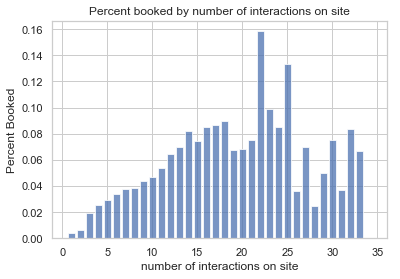

In [12]:
bdf = booked_df
num_booked_users = len(bdf['user_id'].unique())
df = non_booked_df
num_nb_users = len(df['user_id'].unique())
print('For all users: ')
print('Numbers of users who booked: ',num_booked_users)
print('Numbers of total users: ',num_booked_users+num_nb_users)
print('Percentage Booked: ',num_booked_users/(num_booked_users+num_nb_users))
print('------------------------------')
y = []
for i in range(1,35):
    num_date = i
    bdf = booked_df[booked_df.num_interactions==i]
    num_booked_users = len(bdf['user_id'].unique())
    df = non_booked_df[non_booked_df.num_interactions==i]
    num_nb_users = len(df['user_id'].unique())
    y.append(num_booked_users/(num_booked_users+num_nb_users))
x = np.arange(34)+1
ax = plt.bar(x, y, align='center', alpha=0.75)
plt.ylabel('Percent Booked')
plt.xlabel('number of interactions on site')
plt.title('Percent booked by number of interactions on site')
plt.show()

For all users: 
Numbers of users who booked:  8203
Numbers of total users:  363619
Percentage Booked:  0.022559327207874177
------------------------------


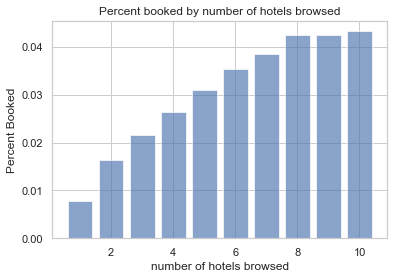

In [13]:
bdf = booked_df
num_booked_users = len(bdf['user_id'].unique())
df = non_booked_df
num_nb_users = len(df['user_id'].unique())
print('For all users: ')
print('Numbers of users who booked: ',num_booked_users)
print('Numbers of total users: ',num_booked_users+num_nb_users)
print('Percentage Booked: ',num_booked_users/(num_booked_users+num_nb_users))
print('------------------------------')
y = []
for i in range(1,11):
    num_date = i
    bdf = booked_df[booked_df.num_unique_hotel_browse==i]
    num_booked_users = len(bdf['user_id'].unique())
    df = non_booked_df[non_booked_df.num_unique_hotel_browse==i]
    num_nb_users = len(df['user_id'].unique())
    y.append(num_booked_users/(num_booked_users+num_nb_users))
x = np.arange(10)+1
ax = plt.bar(x, y, align='center', alpha=0.65)
plt.ylabel('Percent Booked')
plt.xlabel('number of hotels browsed')
plt.title('Percent booked by number of hotels browsed')
plt.show()

# Hotel Side Exploration

Now we will attempt to explore factors that is related to whether a hotel will be booked. 
Most of the cells here are just data preparation. Skip to the next markdown cell for more info

In [14]:
activity = pd.read_csv('activity_data.csv')
hotel = pd.read_csv('hotel_data.csv')

In [15]:
temp = activity[activity.user_action == 'booking']
temp['num_booked'] = temp.groupby('hotel_id')['user_id'].transform('count')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#this is for looking up number of bookings
index = temp[['hotel_id','num_booked']].drop_duplicates(subset = 'hotel_id').sort_values('num_booked', ascending = False).reset_index(drop = True).set_index(keys = 'hotel_id')

,num_booked
hotel_id,
2079052,296
93454,256
122005,177
10066892,140
93437,140


In [17]:
temp = activity
temp['num_interacted'] = temp.groupby('hotel_id')['user_id'].transform('count')
index2 = temp[['hotel_id','num_interacted']].drop_duplicates(subset = 'hotel_id').sort_values('num_interacted', ascending = False).reset_index(drop = True).set_index(keys = 'hotel_id')

,num_interacted
hotel_id,
2079052,42340
93454,34530
122005,28373
10066892,25038
214197,22359


In [18]:
"""
bookdf = activity[activity.user_action=='booking']
booked_hotels = bookdf['hotel_id'].unique()
npbook = np.asarray(booked_hotels)
np.save('bookedhotels', npbook)
"""

booked_hotels = np.load('bookedhotels.npy')
print("Numbers of unique users who booked: "+str(len(booked_hotels))+ ' out of '+str(len(hotel['hotel_id'].unique()))+' hotels' )

Numbers of unique users who booked: 563 out of 1057 hotels


In [19]:
def level_of_review(num_reviews):
    num_reviews = int(num_reviews)
    if(num_reviews<1):
        return 1
    elif(num_reviews<10):
        return 2
    elif(num_reviews<100):
        return 3
    elif(num_reviews<1000):
        return 4
    elif(num_reviews<5000):
        return 5
    else:
        return 6
    

In [20]:
hotel['booked'] = hotel.apply(lambda row:1 if row['hotel_id'] in booked_hotels else 0, axis = 1)
hotel['num_booked'] = 0
for i in range(hotel.shape[0]):
    if(hotel.iloc[i]['hotel_id'] in index.index):
        hotel.at[i,'num_booked'] = index.loc[hotel.iloc[i]['hotel_id']]['num_booked']
    else:
        hotel.at[i,'num_booked'] = 0
hotel['num_interacted'] = 0
for i in range(hotel.shape[0]):
    if(hotel.iloc[i]['hotel_id'] in index.index):
        hotel.at[i,'num_interacted'] = index2.loc[hotel.iloc[i]['hotel_id']]['num_interacted']
    else:
        hotel.at[i,'num_interacted'] = 0
hotel['book_per_view_ratio'] = 0.0
for i in range(hotel.shape[0]):
    if(hotel.iloc[i]['num_interacted']!=0):
        hotel.at[i,'book_per_view_ratio'] = float(hotel.iloc[i]['num_booked']/hotel.iloc[i]['num_interacted'])
hotel['booked'] = hotel.apply(lambda row:1 if row['hotel_id'] in booked_hotels else 0, axis = 1)
hotel['num_reviews_level'] = 0
for i in range(hotel.shape[0]):
    hotel.at[i,'num_reviews_level'] = level_of_review(int(hotel.iloc[i]['review_count']))

## Hotel Features

We computed a few more features for hotels. 

"booked" is a one hot encoding for whether the hotel has been booked by anybody at all. 1 means booked, 0 means nope. 

"num_interacted" is the number of times users interact with the hotel. Interaction includes all kinds of action. 

"Book per view ratio" is actually book per interaction ratio. It signifies the interact-to-booking conversion rate. 

"num_reviews_level" is a discreet level for review_count. You can find the cutoff a bit above in the function level_of_review 

In [21]:
hotel.sort_values('num_booked',ascending = False).head(50)

,hotel_id,hotel_name,city_name,star_rating,bubble_score,review_count,hotel_type,brand_name,parent_brand_name,booked,num_booked,num_interacted,book_per_view_ratio,num_reviews_level
706,2079052,YOTEL New York,New York City,4.0,45.0,12286,Boutique Hotel,Yotel,Yotel,1,296,42340,0.006991,6
1048,93454,Crowne Plaza Times Square Manhattan,New York City,4.0,40.0,11083,Hotel,InterContinental,InterContinental Hotels Group PLC,1,256,34530,0.007414,6
361,122005,The New Yorker a Wyndham Hotel,New York City,2.0,40.0,13628,Hotel,Wyndham,Wyndham Hotel Group,1,177,28373,0.006238,6
40,93437,Hotel Edison Times Square,New York City,4.0,40.0,11767,Hotel,NaN,NaN,1,140,17196,0.008141,6
708,10066892,Hotel 50 Bowery NYC,New York City,4.5,50.0,1317,Hotel,Joie de Vivre,Commune Hotels & Resorts,1,140,25038,0.005592,5
790,93562,Stewart Hotel,New York City,4.0,40.0,6836,Hotel,None,NaN,1,128,18466,0.006932,6
1036,93358,Pod 51 Hotel,New York City,3.0,40.0,5413,Hotel,None,NaN,1,119,18624,0.006390,6
348,99352,Hilton Garden Inn Times Square,New York City,3.5,45.0,8181,Hotel,Hilton Hotels,Hilton Worldwide,1,116,18364,0.006317,6
576,214197,Hotel Pennsylvania,New York City,2.5,25.0,7861,Hotel,NaN,NaN,1,116,22359,0.005188,6
253,93545,The Manhattan at Times Square Hotel,New York City,4.0,40.0,10969,Hotel,None,NaN,1,109,16976,0.006421,6


## Hotel distribution by stars

We can see that most hotels on TripAdvisor are 2-5 stars. 

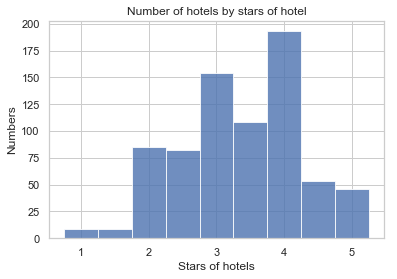

In [22]:
x = []
y = []
for i in range(9):
    star = 1+0.5*i
    temp = hotel[hotel.star_rating==star]
    btemp = temp[temp.booked == 1]
    y.append(temp.shape[0])
    x.append(star)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 0.5)
plt.ylabel('Numbers')
plt.xlabel('Stars of hotels')
plt.title('Number of hotels by stars of hotel')
plt.show()

## Percent of hotels with any booking at all per star

There is a positive correlation between having any booking and stars of hotel. 

Most hotels with no bookings are low in stars. 

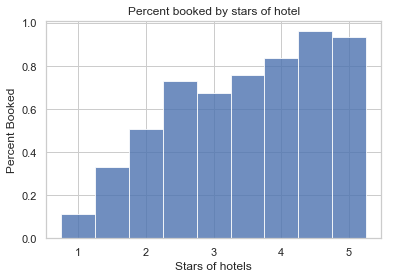

In [23]:
x = []
y = []
for i in range(9):
    star = 1+0.5*i
    temp = hotel[hotel.star_rating==star]
    btemp = temp[temp.booked == 1]
    y.append(btemp.shape[0]/temp.shape[0])
    x.append(star)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 0.5)
plt.ylabel('Percent Booked')
plt.xlabel('Stars of hotels')
plt.title('Percent booked by stars of hotel')
plt.show()


## Average Book per view ration by stars of hotel

We can see that the book per view ratio is ~5% for all stars. 

This means that stars might not be related to the 
view-to-book conversion rate. 

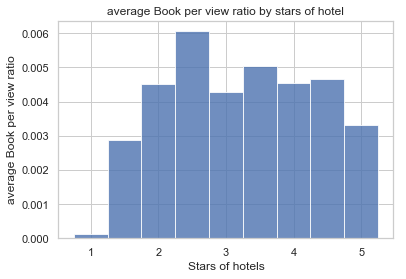

In [30]:
x = []
y = []
for i in range(9):
    star = 1+0.5*i
    temp = hotel[hotel.star_rating==star]
    avg = sum(temp['book_per_view_ratio'].values)/temp.shape[0]
    y.append(avg)
    x.append(star)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 0.5)
plt.ylabel('average Book per view ratio')
plt.xlabel('Stars of hotels')
plt.title('average Book per view ratio by stars of hotel')
plt.show()

## Percent of hotel booked by each Bubble Score

Only ~20% of hotels with 15-30 bubble score has any booking, while ~80% of hotels with 40-45 bubble score has booking

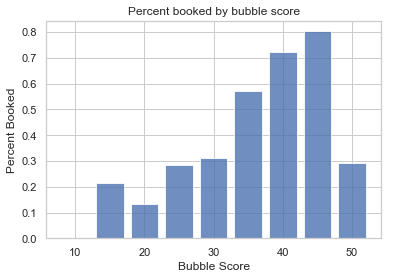

In [25]:
x = []
y = []
for i in range(9):
    bubblescore = 10+5*i
    temp = hotel[hotel.bubble_score==bubblescore]
    btemp = temp[temp.booked == 1]
    y.append(btemp.shape[0]/temp.shape[0])
    x.append(bubblescore)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 4)
plt.ylabel('Percent Booked')
plt.xlabel('Bubble Score')
plt.title('Percent booked by bubble score')
plt.show()

## Book per view by bubble score

Hotels with bubble score 25 and above seems to have significantly higher transaction-to-booking conversion rate. 

I suspect that hotel with bubble score 50 has low transaction-to-booking conversion rate because of low number of reviews, but I have no time to prove this yet. 

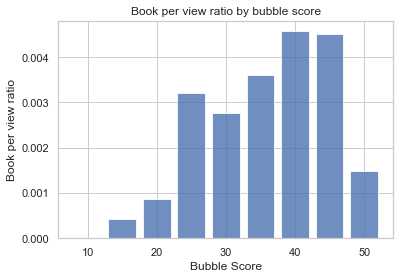

In [31]:
x = []
y = []
for i in range(9):
    bubblescore = 10+5*i
    temp = hotel[hotel.bubble_score==bubblescore]
    avg = sum(temp['book_per_view_ratio'].values)/temp.shape[0]
    y.append(avg)
    x.append(bubblescore)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 4)
plt.ylabel('Book per view ratio')
plt.xlabel('Bubble Score')
plt.title('Book per view ratio by bubble score')
plt.show()

## Percent of hotels booked by number of reviews

Most hotels that have a large number of reviews are booked some time in January. 

This is possibly because TripAdvisor put hotels with high number of reviews in the first few pages so it has a high booking rate.  

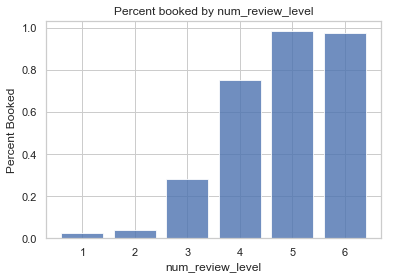

In [27]:
x = []
y = []
for i in range(6):
    num_reviews_level = 1+i
    temp = hotel[hotel.num_reviews_level == num_reviews_level]
    btemp = temp[temp.booked == 1]
    y.append(btemp.shape[0]/temp.shape[0])
    x.append(num_reviews_level)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 0.8)
plt.ylabel('Percent Booked')
plt.xlabel('num_review_level')
plt.title('Percent booked by num_review_level')
plt.show()

The transaction-to-booking conversion rate is also higher for hotels with many reviews.

1 119
2 178
3 187
4 275
5 253
6 45


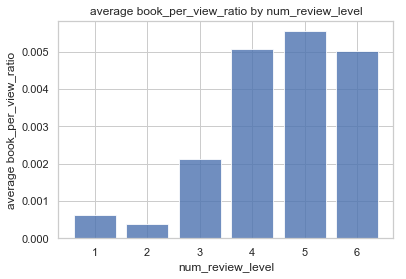

In [28]:
x = []
y = []
for i in range(6):
    num_reviews_level = 1+i
    temp = hotel[hotel.num_reviews_level == num_reviews_level]
    avg = sum(temp['book_per_view_ratio'].values)/temp.shape[0]
    print(num_reviews_level, temp.shape[0])
    y.append(avg)
    x.append(num_reviews_level)
ax = plt.bar(x, y, align='center', alpha=0.8, width = 0.8)
plt.ylabel('average book_per_view_ratio')
plt.xlabel('num_review_level')
plt.title('average book_per_view_ratio by num_review_level')
plt.show()